### Importing and reading the dataset

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/agnih/Documents/MBA-3rd Semester/Machine Learning/LS2014Candidate.csv", engine='python')
df.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5


### Checking the details of each column of the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_CODE             8794 non-null   object 
 1   State name          8794 non-null   object 
 2   Month               8794 non-null   int64  
 3   Year                8794 non-null   int64  
 4   PC Number           8794 non-null   int64  
 5   PC name             8794 non-null   object 
 6   PC Type             8794 non-null   object 
 7   Candidate Name      8794 non-null   object 
 8   Candidate Sex       8252 non-null   object 
 9   Candidate Category  8252 non-null   object 
 10  Candidate Age       8252 non-null   float64
 11  Party Abbreviation  8794 non-null   object 
 12  Total Votes Polled  8794 non-null   int64  
 13  Position            8794 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 962.0+ KB


### Renaming columns

In [3]:
df.columns = ['ST_CODE', 'State name', 'Month', 'Year', 'PC Number', 'PC name',
       'PC Type', 'cname', 'Sex', 'Category',
       'Age', 'Party', 'Tvotes',
       'Position']
df.columns

Index(['ST_CODE', 'State name', 'Month', 'Year', 'PC Number', 'PC name',
       'PC Type', 'cname', 'Sex', 'Category', 'Age', 'Party', 'Tvotes',
       'Position'],
      dtype='object')

### Making column names into same format

In [4]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_")
df.columns

Index(['st_code', 'state_name', 'month', 'year', 'pc_number', 'pc_name',
       'pc_type', 'cname', 'sex', 'category', 'age', 'party', 'tvotes',
       'position'],
      dtype='object')

### Checking 15 random samples from the dataset

In [5]:
df.sample(15)

,st_code,state_name,month,year,pc_number,pc_name,pc_type,cname,sex,category,age,party,tvotes,position
2736,S11,Kerala,5,2014,4,Wayanad,GEN,SAM P MATHEW,M,GEN,39.0,CPIM,1222,14
911,S04,Bihar,5,2014,6,Madhubani,GEN,PROF. GHULAM GHOUS,M,GEN,52.0,JD(U),56392,3
2223,S10,Karnataka,5,2014,1,Chikkodi,GEN,KATTI RAMESH VISHWANATH,M,GEN,49.0,BJP,471370,2
6844,S24,Uttar Pradesh,5,2014,44,Akbarpur,GEN,RAM SEVAK,M,SC,63.0,IND,3403,10
7737,S25,West Bengal,5,2014,21,Diamond harbour,GEN,SAMIR PUTATUNDA,M,GEN,61.0,PDS,1322,15
6257,S24,Uttar Pradesh,5,2014,10,Meerut,GEN,MOHD. SAJID SAIFI,M,GEN,44.0,BMUP,1063,10
6149,S24,Uttar Pradesh,5,2014,3,Muzaffarnagar,GEN,GUFRAN AHMAD,M,GEN,29.0,IND,1682,12
5464,S22,Tamil Nadu,5,2014,12,Arani,GEN,V.ELUMALAI,M,GEN,58.0,ADMK,502721,1
5218,S22,Tamil Nadu,5,2014,2,Chennai North,GEN,BIJU CHACKO,M,GEN,44.0,INC,24190,4
5895,S22,Tamil Nadu,5,2014,32,Madurai,GEN,A THAVAMANI,M,SC,49.0,BSP,1253,15


### Creating a column with age range of the candidates

In [6]:
df['age_bins'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49,59,69,79,89])
df

,st_code,state_name,month,year,pc_number,pc_name,pc_type,cname,sex,category,age,party,tvotes,position,age_bins
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1,"(39, 49]"
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2,"(29, 39]"
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3,"(39, 49]"
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4,"(49, 59]"
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5,"(39, 49]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465,27,"(59, 69]"
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438,28,"(49, 59]"
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366,29,"(29, 39]"
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309,30,"(29, 39]"


### Grouping age-ranges in a different column 

In [7]:
df['age_by_decade'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49,59,69,79,89], 
                             labels=['20s', '30s', '40s','50s', '60s', '70s', '80s'])
df

,st_code,state_name,month,year,pc_number,pc_name,pc_type,cname,sex,category,age,party,tvotes,position,age_bins,age_by_decade
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1,"(39, 49]",40s
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2,"(29, 39]",30s
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3,"(39, 49]",40s
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4,"(49, 59]",50s
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5,"(39, 49]",40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465,27,"(59, 69]",60s
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438,28,"(49, 59]",50s
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366,29,"(29, 39]",30s
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309,30,"(29, 39]",30s


### Q.1 What is the count of candidates by age-range? 

In [8]:
pd.value_counts(df.age_by_decade)

40s    2545
30s    1952
50s    1828
60s    1164
20s     471
70s     269
80s      22
Name: age_by_decade, dtype: int64

### Q.2 Focusing on West Bengal

In [9]:
wb=df[df.state_name=='West Bengal']

In [10]:
wb.info()
#There are some null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 7479 to 7992
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   st_code        514 non-null    object  
 1   state_name     514 non-null    object  
 2   month          514 non-null    int64   
 3   year           514 non-null    int64   
 4   pc_number      514 non-null    int64   
 5   pc_name        514 non-null    object  
 6   pc_type        514 non-null    object  
 7   cname          514 non-null    object  
 8   sex            472 non-null    object  
 9   category       472 non-null    object  
 10  age            472 non-null    float64 
 11  party          514 non-null    object  
 12  tvotes         514 non-null    int64   
 13  position       514 non-null    int64   
 14  age_bins       472 non-null    category
 15  age_by_decade  472 non-null    category
dtypes: category(2), float64(1), int64(5), object(8)
memory usage: 62.0+ KB


In [11]:
wb.sample(10)

,st_code,state_name,month,year,pc_number,pc_name,pc_type,cname,sex,category,age,party,tvotes,position,age_bins,age_by_decade
7768,S25,West Bengal,5,2014,23,Kolkata Dakshin,GEN,KARAN SINGH,M,GEN,59.0,IJP,1103,15,"(49, 59]",50s
7873,S25,West Bengal,5,2014,32,Ghatal,GEN,GOPAL MURMU,M,ST,41.0,JHAP,2154,9,"(39, 49]",40s
7592,S25,West Bengal,5,2014,9,Jangipur,GEN,SAMRAT GHOSH,M,GEN,29.0,BJP,96751,4,"(20, 29]",20s
7520,S25,West Bengal,5,2014,4,Darjeeling,GEN,MAHENDRA P. LAMA,M,ST,53.0,IND,55767,5,"(49, 59]",50s
7989,S25,West Bengal,5,2014,42,Birbhum,GEN,AYESHA KHATUN,F,GEN,45.0,SUCI,6593,9,"(39, 49]",40s
7886,S25,West Bengal,5,2014,33,Jhargram,ST,SUBODH KUMAR MANDI,M,ST,43.0,IND,7453,11,"(39, 49]",40s
7703,S25,West Bengal,5,2014,19,Joynagar,SC,DR. TARUN MANDAL,M,SC,55.0,SUCI,117454,3,"(49, 59]",50s
7871,S25,West Bengal,5,2014,32,Ghatal,GEN,GOUTAM KOURI,M,GEN,35.0,AMB,5547,7,"(29, 39]",30s
7593,S25,West Bengal,5,2014,9,Jangipur,GEN,MD. SAHABUDDIN,M,GEN,54.0,SDPI,17257,5,"(49, 59]",50s
7752,S25,West Bengal,5,2014,22,Jadavpur,GEN,PINTU SANPUI,M,SC,39.0,BMUP,1340,13,"(29, 39]",30s


In [12]:
cleanwb=wb.dropna(inplace=False)
#The null values have been cleaned and saved in cleanwb.

In [13]:
cleanwb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 7479 to 7992
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   st_code        472 non-null    object  
 1   state_name     472 non-null    object  
 2   month          472 non-null    int64   
 3   year           472 non-null    int64   
 4   pc_number      472 non-null    int64   
 5   pc_name        472 non-null    object  
 6   pc_type        472 non-null    object  
 7   cname          472 non-null    object  
 8   sex            472 non-null    object  
 9   category       472 non-null    object  
 10  age            472 non-null    float64 
 11  party          472 non-null    object  
 12  tvotes         472 non-null    int64   
 13  position       472 non-null    int64   
 14  age_bins       472 non-null    category
 15  age_by_decade  472 non-null    category
dtypes: category(2), float64(1), int64(5), object(8)
memory usage: 57.0+ KB


In [14]:
cleanwb.sample(10)

,st_code,state_name,month,year,pc_number,pc_name,pc_type,cname,sex,category,age,party,tvotes,position,age_bins,age_by_decade
7738,S25,West Bengal,5,2014,21,Diamond harbour,GEN,HABIBUR RAHAMAN MOLLA,M,GEN,35.0,RJNP,1260,16,"(29, 39]",30s
7987,S25,West Bengal,5,2014,42,Birbhum,GEN,PRASANTA ROY,M,GEN,45.0,SP,7194,7,"(39, 49]",40s
7740,S25,West Bengal,5,2014,22,Jadavpur,GEN,SUGATA BOSE,M,GEN,57.0,AITC,584244,1,"(49, 59]",50s
7526,S25,West Bengal,5,2014,4,Darjeeling,GEN,SUNIL PANDIT,M,GEN,34.0,RJNP,3043,11,"(29, 39]",30s
7806,S25,West Bengal,5,2014,26,Uluberia,GEN,SABIR UDDIN MOLLA,M,GEN,39.0,CPM,369563,2,"(29, 39]",30s
7899,S25,West Bengal,5,2014,34,Medinipur,GEN,MUKIM KHAN,M,GEN,60.0,JMM,5339,10,"(59, 69]",60s
7872,S25,West Bengal,5,2014,32,Ghatal,GEN,GOPAL MONDAL,M,GEN,30.0,IND,4498,8,"(29, 39]",30s
7904,S25,West Bengal,5,2014,35,Purulia,GEN,BIKASH BANERJEE,M,GEN,47.0,BJP,86236,4,"(39, 49]",40s
7886,S25,West Bengal,5,2014,33,Jhargram,ST,SUBODH KUMAR MANDI,M,ST,43.0,IND,7453,11,"(39, 49]",40s
7693,S25,West Bengal,5,2014,18,Basirhat,GEN,SAMIK BHATTACHARYA,M,GEN,51.0,BJP,233887,3,"(49, 59]",50s


### Q.3 What is the count of candidates by age-range in West Bengal? 

In [35]:
pd.value_counts(cleanwb.age_by_decade)

40s    121
50s    117
60s     98
30s     96
70s     25
20s     14
80s      1
Name: age_by_decade, dtype: int64

### Q.4a What is the number of parliamentary constituency type in West Bengal?

In [15]:
cleanwb.pc_type.nunique()

3

### Q.4b What is the counts of different parliamentary constituency type in West Bengal?

In [16]:
pd.value_counts(cleanwb.pc_type)

GEN    355
SC      94
ST      23
Name: pc_type, dtype: int64

### Q.4c Pie-chart of different parliamentary constituency type in West Bengal

<ipython-input-17-dddb5b1754cf>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(cleanwb1, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)


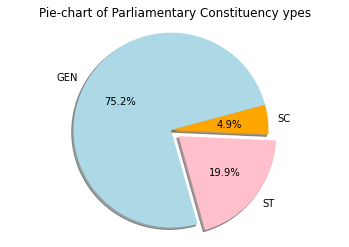

In [17]:
cleanwb1 = {'pc_type': [355,94,23]}
cleanwb1 = pd.DataFrame(cleanwb1,columns=['pc_type'])

my_labels = 'GEN','ST','SC'
my_colors = ['lightblue','pink','orange']
my_explode = (0, 0.1, 0)
plt.pie(cleanwb1, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Pie-chart of Parliamentary Constituency ypes')
plt.axis('equal')
plt.show()

### Q.5a What is the number of category of candidates in West Bengal?

In [18]:
cleanwb.category.nunique()

3

### Q.5b What is the counts of category of candidates in West Bengal?

In [19]:
pd.value_counts(cleanwb.category)

GEN    277
SC     151
ST      44
Name: category, dtype: int64

### Q.5c Pie-chart showing the percentages of candidate-category in West Bengal 

<ipython-input-20-2dc2e8763b90>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(cleanwb2, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)


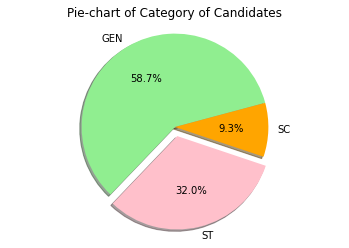

In [20]:
cleanwb2 = {'category': [277,151,44]}
cleanwb2 = pd.DataFrame(cleanwb2,columns=['category'])

my_labels = 'GEN','ST','SC'
my_colors = ['lightgreen','pink','orange']
my_explode = (0, 0.1, 0)
plt.pie(cleanwb2, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Pie-chart of Category of Candidates')
plt.axis('equal')
plt.show()

### Q.6a What is the gender ratio of the candidates in West Bengal?

In [21]:
pd.value_counts(cleanwb.sex)

M    421
F     51
Name: sex, dtype: int64

### Q.6b Pie-chart showing the gender ratio of the candidates in West Bengal 

<ipython-input-22-af5166d07fc9>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(cleanwb3, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)


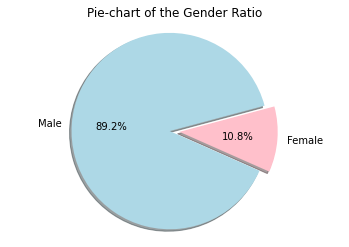

In [22]:
cleanwb3 = {'sex': [421,51]}
cleanwb3 = pd.DataFrame(cleanwb3,columns=['sex'])

my_labels = 'Male','Female'
my_colors = ['lightblue','pink']
my_explode = (0, 0.1)
plt.pie(cleanwb3, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Pie-chart of the Gender Ratio')
plt.axis('equal')
plt.show()

### Q.7a What is the party-wise number of male candidates?

In [23]:
cleanwb.loc[cleanwb.sex == "M" ,'party'].value_counts()

IND           77
BJP           41
INC           34
SUCI          34
BSP           33
AITC          30
CPM           26
BMUP          15
AMB           12
JDP           11
IUML           9
AIUDF          8
WPOI           8
JMM            7
RaJSP          7
PDS            7
RJNP           6
CPI(ML)(L)     5
RPI(A)         4
RSP            4
AAAP           4
SDPI           4
SP             3
CPI            3
JeSM           3
JHAP           3
GaAP           3
IUC            3
AIFB           3
RAHM           2
JVM            2
CPIM           2
NSBP           1
SWJP           1
AIMF           1
IJP            1
grac           1
TRMRPPI        1
JD(U)          1
AKBJHP         1
Name: party, dtype: int64

### Q.7b What is the party-wise number of female candidates?

In [24]:
cleanwb.loc[cleanwb.sex == "F" ,'party'].value_counts()

AITC      12
INC        8
IND        6
CPM        6
BSP        5
CPIM       3
SUCI       3
BJP        1
HKRD       1
JKP(N)     1
JDP        1
BMUP       1
RJNP       1
RaJSP      1
WPOI       1
Name: party, dtype: int64

### Q.8 Scatter diagram depicting the number of total votes polled in each parliamentary constituency in West Bengal

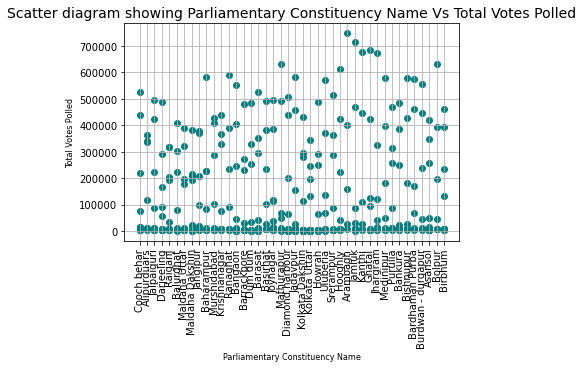

<Figure size 720x720 with 0 Axes>

In [25]:
cleanwb4 = pd.DataFrame(cleanwb,columns=['pc_name','tvotes'])
plt.scatter(cleanwb4['pc_name'], cleanwb4['tvotes'], color='teal')
plt.title('Scatter diagram showing Parliamentary Constituency Name Vs Total Votes Polled', fontsize=14)
plt.xlabel('Parliamentary Constituency Name', fontsize=8)
plt.ylabel('Total Votes Polled', fontsize=8)
plt.xticks(rotation=90)
plt.grid(True)
plt.figure(figsize=(10,10))
plt.show()

### Q.9 Descriptive statistics of age and total number of votes polled

In [26]:
cleanwb.loc[:,['age','tvotes']].describe()

,age,tvotes
count,472.000000,472.000000
mean,50.430085,108179.097458
std,12.257992,175316.560766
min,25.000000,518.000000
25%,40.750000,3946.500000
50%,50.000000,7576.500000
75%,60.000000,172871.000000
max,81.000000,748764.000000


### Q.10a Which party got more than 500000 votes and its counts?

In [27]:
cleanwb.loc[cleanwb.tvotes >= 500000 ,'party'].value_counts()

AITC    20
INC      1
Name: party, dtype: int64

### Q.10b Which party got less than 1000 votes and its counts?

In [28]:
cleanwb.loc[cleanwb.tvotes <= 1000 ,'party'].value_counts()

IND     2
RAHM    1
CPIM    1
IUML    1
BMUP    1
RJNP    1
GaAP    1
Name: party, dtype: int64

### Q.10c Which party got the maximum number of vote?

In [29]:
cleanwb.loc[[cleanwb["tvotes"].idxmax()],["party","cname","pc_name","tvotes"]]

,party,cname,pc_name,tvotes
7840,AITC,APARUPA PODDAR (AFRIN ALI),Arambagh,748764


### Q.10d Which party got the minimum number of vote?

In [30]:
cleanwb.loc[[cleanwb["tvotes"].idxmin()],["party","cname","pc_name","tvotes"]]

,party,cname,pc_name,tvotes
7788,IND,SUNIRMAL BASU,Kolkata Uttar,518


### Q.11 What are the numbers of male and female candidates voted for different parties?

In [31]:
df1=pd.crosstab(cleanwb.party, cleanwb.sex, margins=True, margins_name="Total")
df1.sort_values('Total', ascending=False)

sex,F,M,Total
party,,,
Total,51,421,472
IND,6,77,83
AITC,12,30,42
INC,8,34,42
BJP,1,41,42
BSP,5,33,38
SUCI,3,34,37
CPM,6,26,32
BMUP,1,15,16


### Q.12 Which parties got how many positions?

In [32]:
df2=pd.crosstab(cleanwb.party, cleanwb.position, margins=True, margins_name="Total")
df2.sort_values('Total', ascending=True)

position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Total
party,,,,,,,,,,,,,,,,,,,,
JD(U),0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
JKP(N),0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
IJP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
HKRD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
NSBP,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
grac,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
SWJP,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
TRMRPPI,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
AIMF,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### Q.13 What is the gender-wise age distribution of the candidates?

In [33]:
df3=pd.crosstab(cleanwb.sex, cleanwb.age_by_decade, margins=True, margins_name="Total")
df3.sort_values('Total', ascending=True)

age_by_decade,20s,30s,40s,50s,60s,70s,80s,Total
sex,,,,,,,,
F,3,13,18,9,7,1,0,51
M,11,83,103,108,91,24,1,421
Total,14,96,121,117,98,25,1,472


### Q.14 Name of the candidates vs more than 600000 votes polled 

In [36]:
df4=pd.pivot_table(cleanwb,index=["cname","age_by_decade"],values=["tvotes"])
df5=df4[df4.tvotes>600000]
df5.sort_values('tvotes', ascending=True)

,,tvotes
cname,age_by_decade,
DR. RATNA DE (NAG),60s,614312.0
CHOUDHURY MOHAN JATUA,70s,630262.0
ANUPAM HAZRA,30s,630693.0
UMA SAREN,20s,674504.0
ADHIKARI SISIR KUMAR,70s,676749.0
ADHIKARI DEEPAK (DEV),30s,685696.0
ADHIKARI SUVENDU,40s,716928.0
APARUPA PODDAR (AFRIN ALI),20s,748764.0
